In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

C:\Users\suman\Desktop\AACONDA\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [10]:
file=pd.read_csv('111.csv')

In [11]:
file.head()

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3


In [12]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
Gender    500 non-null object
Height    500 non-null int64
Weight    500 non-null int64
Index     500 non-null int64
dtypes: int64(3), object(1)
memory usage: 15.7+ KB


In [13]:
file.corr()

,Height,Weight,Index
Height,1.000000,0.000446,-0.422223
Weight,0.000446,1.000000,0.804569
Index,-0.422223,0.804569,1.000000


In [14]:
file['Gender']=pd.get_dummies(file['Gender'])

In [15]:
file.head()

,Gender,Height,Weight,Index
0,0,174,96,4
1,0,189,87,2
2,1,185,110,4
3,1,195,104,3
4,0,149,61,3


In [16]:
file.corr()


,Gender,Height,Weight,Index
Gender,1.000000,0.017677,-0.009523,-0.028786
Height,0.017677,1.000000,0.000446,-0.422223
Weight,-0.009523,0.000446,1.000000,0.804569
Index,-0.028786,-0.422223,0.804569,1.000000


In [19]:
file.shape

(500, 4)

In [23]:
x=file.iloc[0:,0:3]
y=file.iloc[0:,3]


In [24]:
x.head()

,Gender,Height,Weight
0,0,174,96
1,0,189,87
2,1,185,110
3,1,195,104
4,0,149,61


In [25]:
y.head()

0    4
1    2
2    4
3    3
4    3
Name: Index, dtype: int64

In [29]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=12,test_size=0.3,stratify=file['Gender'])

In [47]:
from sklearn.linear_model import LinearRegression
logmodel=LinearRegression()
logmodel.fit(x_train,y_train)
print(logmodel.score(x_train,y_train))

0.8329766015357494


In [44]:
print(logmodel.score(x_test,y_test))

0.8066521222070788


In [46]:
import joblib
filename = 'linear_regression.sav'
joblib.dump(logmodel, open(filename, 'wb'))

In [48]:
from sklearn.tree import DecisionTreeRegressor
train_acc=[]
test_acc=[]
d=[]
for depth in range(1,21):
    d.append(depth)
    model=DecisionTreeRegressor(max_depth=depth)
    model.fit(x_train,y_train)
    train_acc.append(model.score(x_train,y_train))
    test_acc.append(model.score(x_test,y_test))


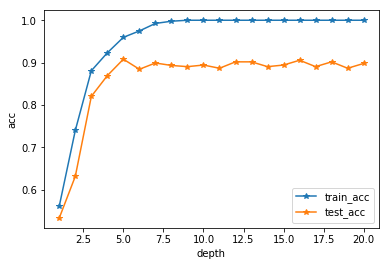

In [49]:
i=plt.plot(d,train_acc,marker='*',label='train_acc')
i=plt.plot(d,test_acc,marker='*',label='test_acc')
plt.xlabel('depth')
plt.ylabel('acc')
plt.legend()

In [51]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor(max_depth=5)
dtr.fit(x_train,y_train)
import joblib
filename = 'DecisionTreeRegressor.sav'
joblib.dump(dtr, open(filename, 'wb'))

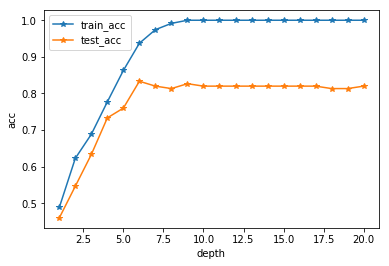

In [54]:
from sklearn.tree import DecisionTreeClassifier
ntrain_acc=[]
ntest_acc=[]
d=[]
for depth in range(1,21):
    d.append(depth)
    model=DecisionTreeClassifier(max_depth=depth)
    model.fit(x_train,y_train)
    ntrain_acc.append(model.score(x_train,y_train))
    ntest_acc.append(model.score(x_test,y_test))
i=plt.plot(d,ntrain_acc,marker='*',label='train_acc')
i=plt.plot(d,ntest_acc,marker='*',label='test_acc')
plt.xlabel('depth')
plt.ylabel('acc')
plt.legend()

In [56]:
print(ntest_acc.index(max(ntest_acc))+1)

6


In [58]:
from sklearn.tree import DecisionTreeClassifier
cdtr=DecisionTreeClassifier(max_depth=6)
cdtr.fit(x_train,y_train)

import joblib
filename = 'DecisionTreeClassifier.sav'
joblib.dump(dtr, open(filename, 'wb'))